In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import missingno as msno

#### German Credit dataset
This dataset classifies people described by a set of attributes as good or bad credit risks.

In [2]:
# Download the dataset from openml
dataset = fetch_openml(data_id=31, as_frame=True)

# Extract features
df_credit = dataset["frame"]
df_credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


#### Investigating the structure
##### Numerical features

Examine the dimension of the dataset and the different data types that the dataset contains

In [3]:
# The dimension of data
print("Shape: ", df_credit.shape)

# Count the different data types
print(pd.value_counts(df_credit.dtypes))


Shape:  (1000, 21)
float64     7
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
dtype: int64


Examine some general statistics about the data i.e the count, mean value, standard deviation maximum ans percentiles

In [4]:
# General Statistics about the numerical features
df_credit.describe(include="number")

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


Check the the number of unique for the numerical values this helps distinguish
among continuous, ordinal and binary values in numerical features

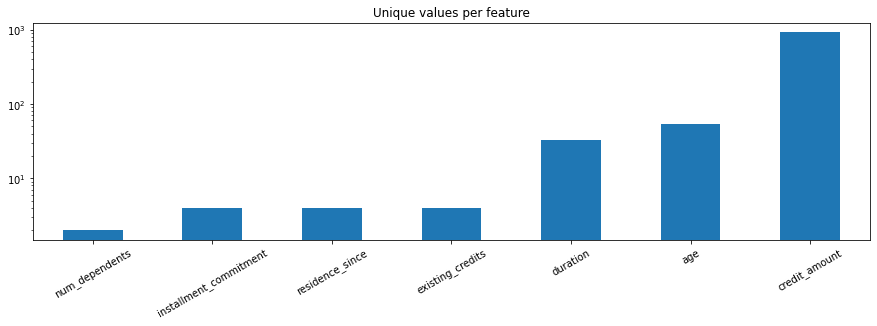

In [5]:
# number of unique values for each numerical features
unique_values = df_credit.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature")
plt.xticks(rotation=30);

#### Non_numerical features

Examine the discriptive features of the nominal values, this checks number of unique variables,
highlights the most frequent variable and gives its frequency

In [6]:
#information about non numerical features
# includes the frequency of the most popular variable
df_credit.describe(exclude="number")

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,no checking,existing paid,radio/tv,<100,1<=X<4,male single,none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


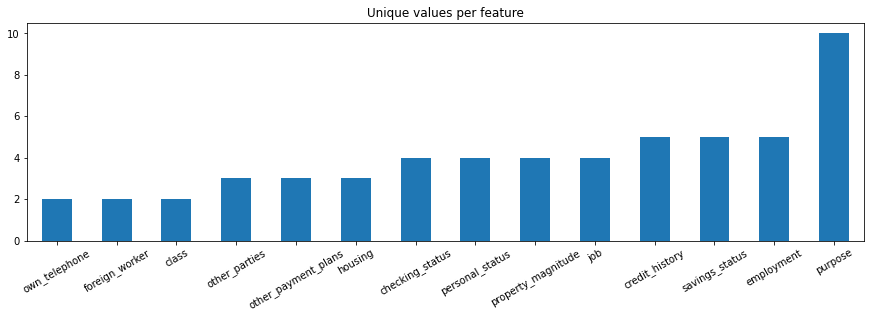

In [7]:
# number of unique values for each non-numerical features
unique_values = df_credit.select_dtypes(exclude="number").nunique().sort_values()

# Plot information 
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature");
plt.xticks(rotation=30);

#### Investigate the quality of the data
Check for missing values, wrong format, duplicates e.t.c

In [8]:
# Check number of duplicates 
number_duplicates = df_credit.duplicated().sum()
print(f"There are {number_duplicates} duplicates in your database.")

There are 0 duplicates in your database.


A graphical view of missing values

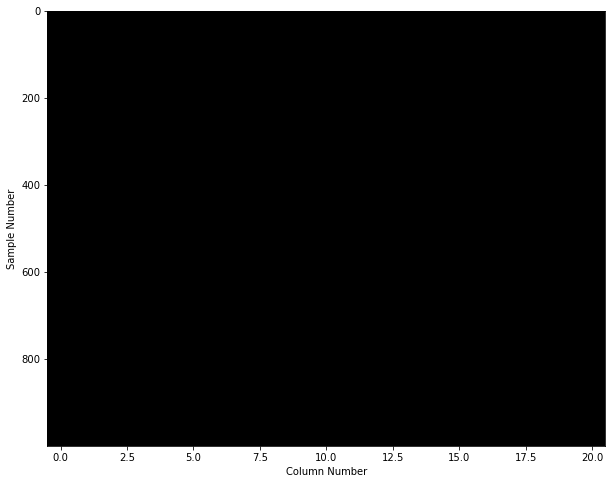

In [9]:
###missing variables
plt.figure(figsize=(10, 8))
plt.imshow(df_credit.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

##From the graph below we do not have any missing values

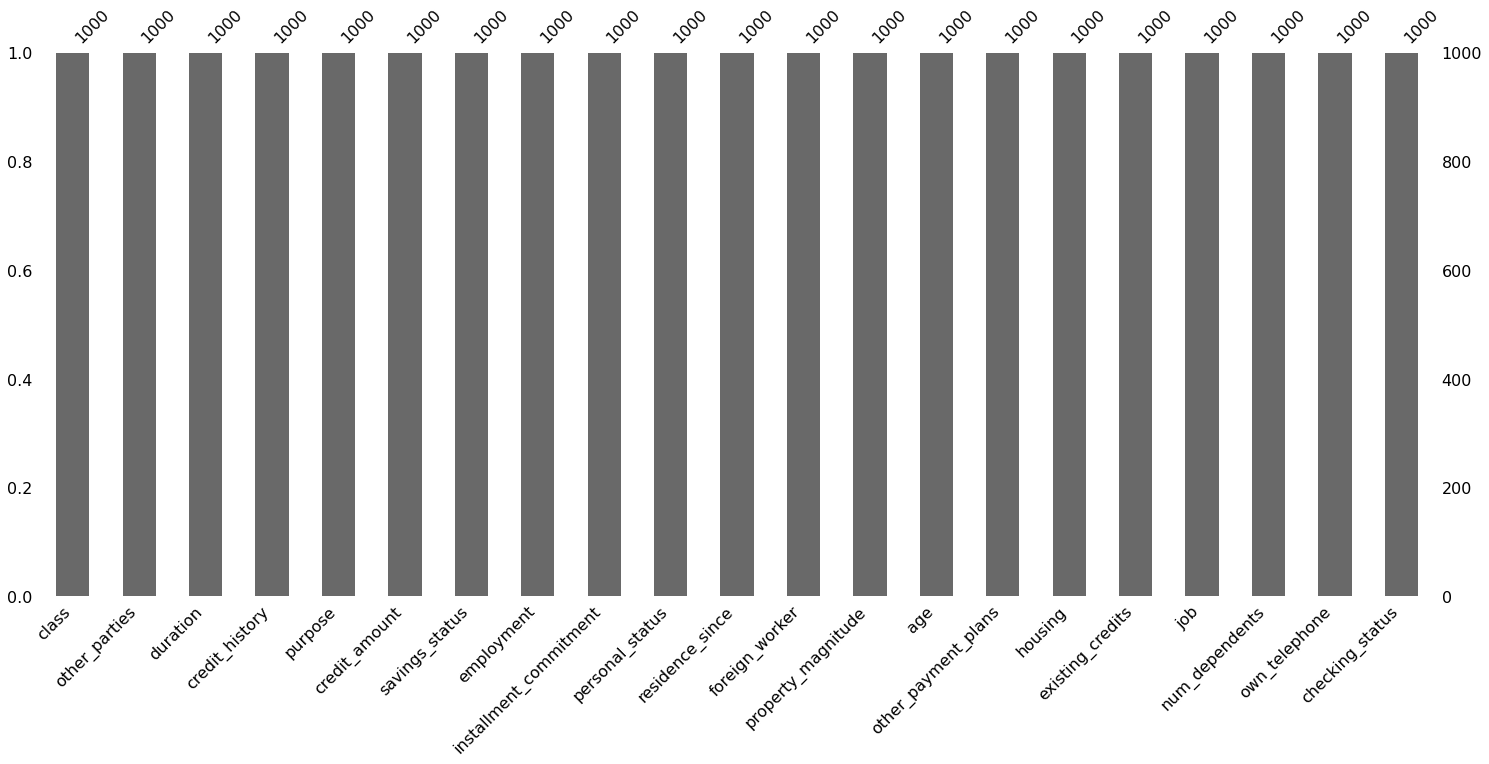

In [10]:
#bar graph to check missing values
msno.bar(df_credit, labels=True, sort="descending");

A graphical representation of numerical features

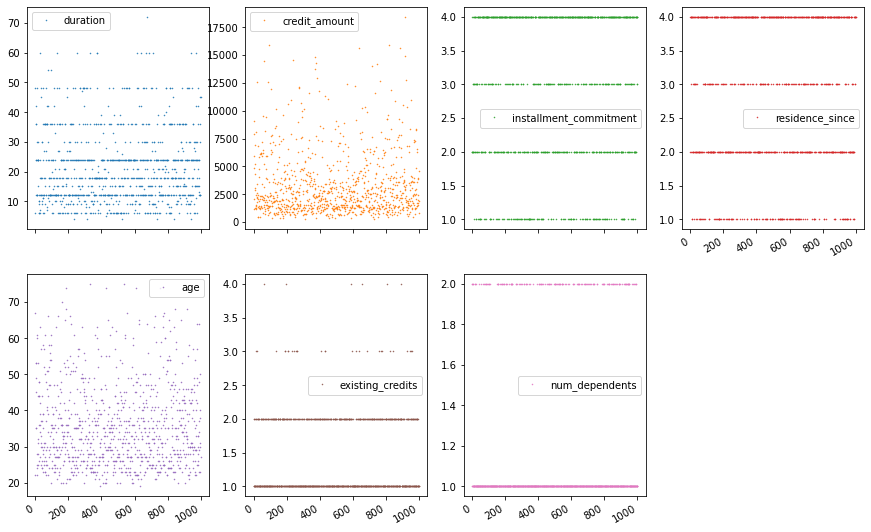

In [11]:
#global view of the numerical dataset in the data
df_credit.plot(lw=0,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(15, 10),
          markersize=1);

A graphical representation of norminal features

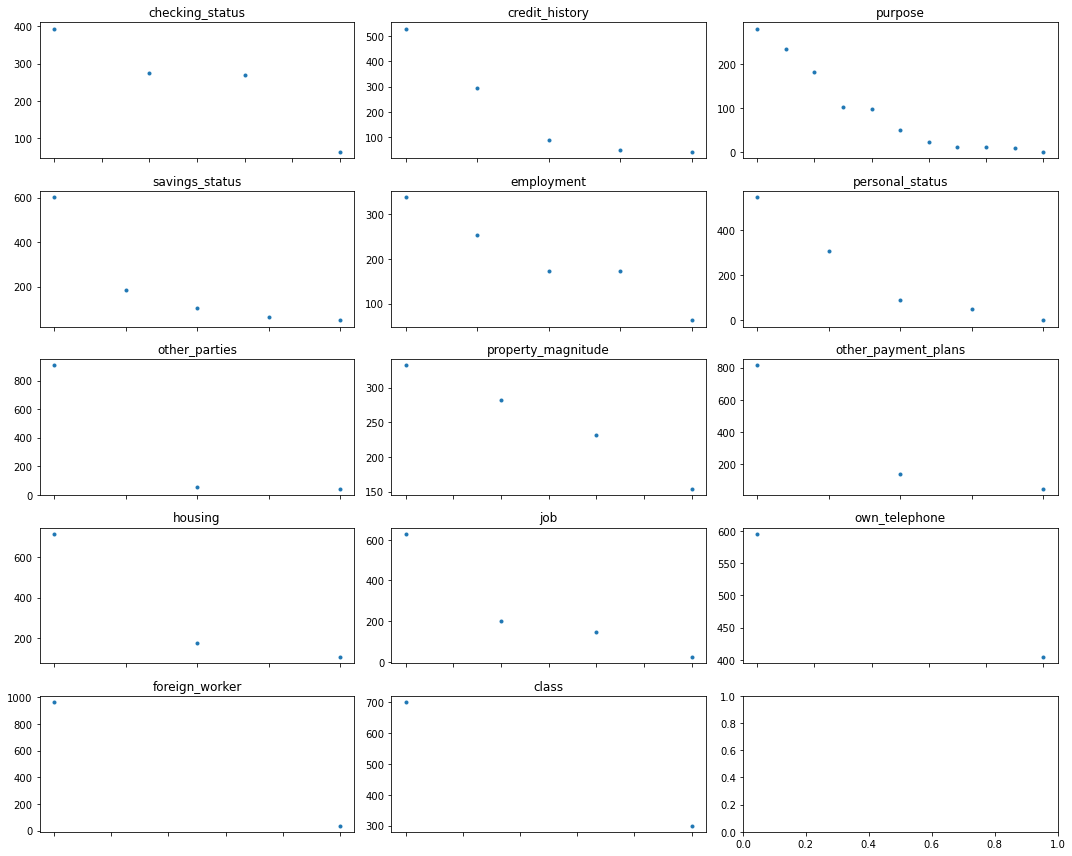

In [12]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(15, 12))

# Identify non-numerical features
df_non_numerical = df_credit.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

#### Investigating the content

Idealy we should explore the content of each feature but it becomes time consuming if our dataset have many features. 
We can however explore the general content of the data.

Feature distribution: We plot histograms of each numerical features. From the histograms we can see which features are ordinal and which are continuous and how they are distributed.

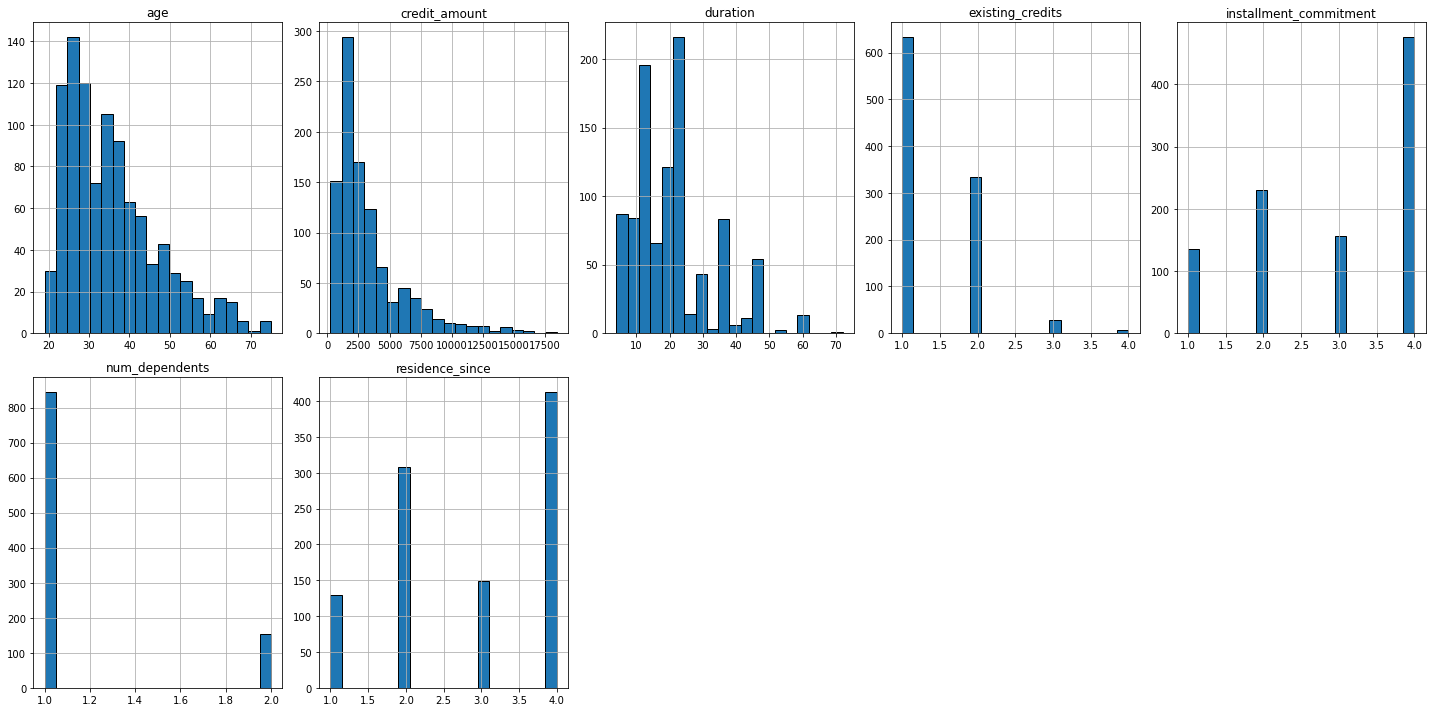

In [13]:
# feature distribution 
# Plots the histogram for each numerical feature
df_credit.hist(bins=20, figsize=(20, 10), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [14]:
# Creates mask to identify numerical features with at least 10 unique features
cols_continuous = df_credit.nunique() >= 10
# Create a new dataframe which only contains the continuous features
df_continuous = df_credit[cols_continuous[cols_continuous].index]
df_continuous.shape

(1000, 4)

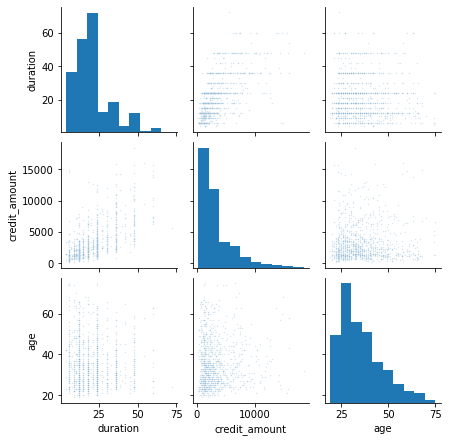

In [15]:
import seaborn as sns
sns.pairplot(df_continuous, height=2,
             plot_kws={"s": 2, "alpha": 0.2});

In [16]:
# Create a new dataframe which doesn't contain continuous features
df_discrete = df_credit[cols_continuous[~cols_continuous].index]
df_discrete.shape

(1000, 17)

We use age to stretch the values over the y-axis 
The main interest in this kind of plot is to see how many samples each discrete value contains.

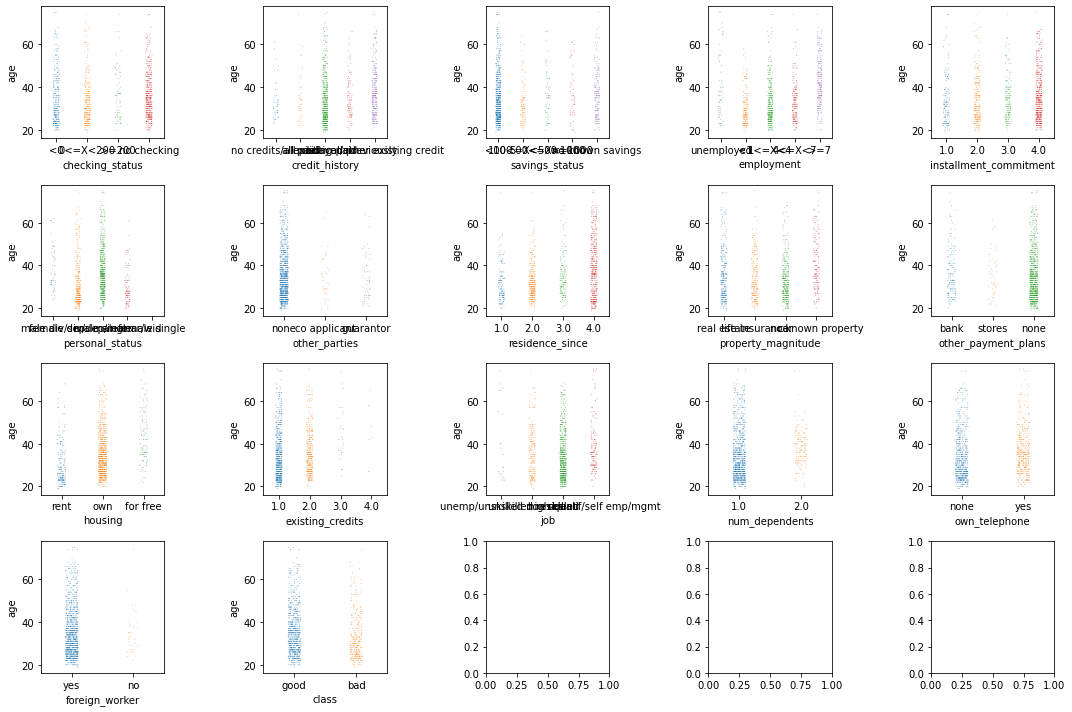

In [17]:
# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_credit["age"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(
  ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_credit, x=col, y=y_value, ax=ax,
                  palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

Select features you would want to investigate some more and plot violineplots to asses the distribution

In [19]:
# Specify features of interest
selected_features = ["checking_status", "existing_credits",
                     "savings_status", "employment",
                     "installment_commitment", "property_magnitude"]

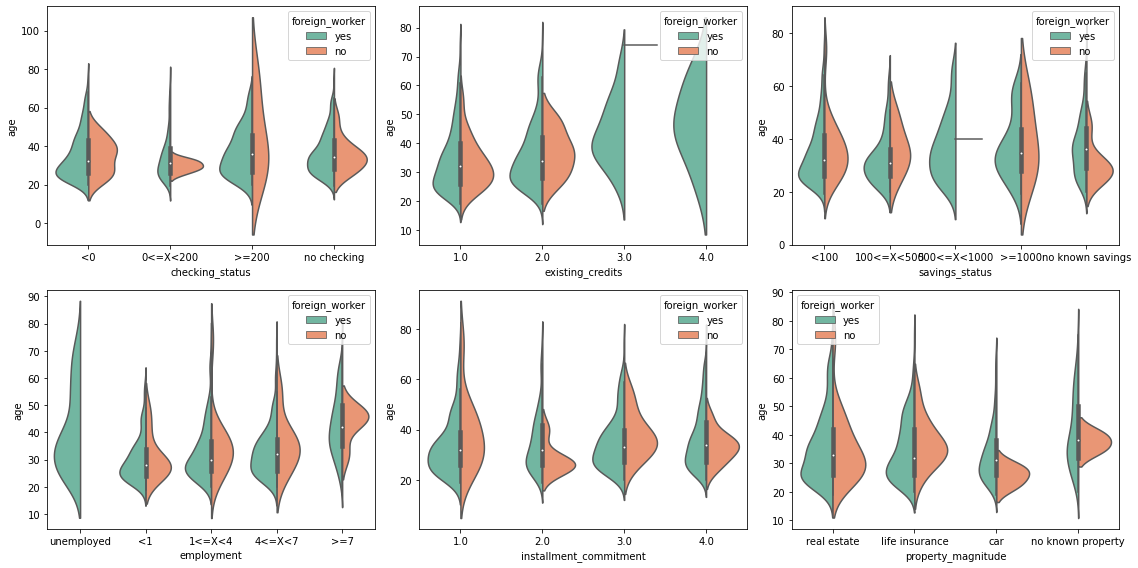

In [20]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_credit, x=col, y=df_credit["age"], palette="Set2",
                   split=True, hue="foreign_worker", ax=ax)
plt.tight_layout();

Investigate the relationship between variables using a corration matrix
From the below matrix we can see features that have strong positive and begative relationship with each other

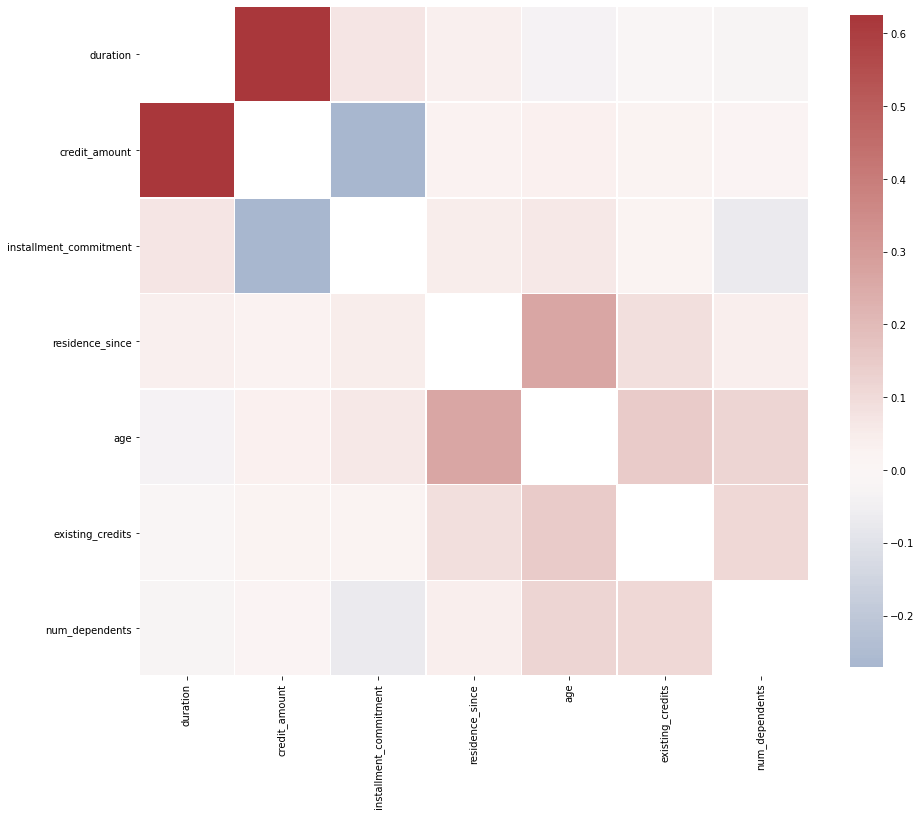

In [21]:
# Computes feature correlation
df_corr = df_credit.corr(method="pearson")

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0,  fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});